<a href="https://colab.research.google.com/github/zayo1511/SimulacionProcesosFinancieros/blob/main/Valuacion_opciones_asiaticas_DiegoLozoya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
stock = 'COST'
endDate = dt.datetime.now()  # define hoy como fecha de fin
startDate = endDate - dt.timedelta(days=365 * 3)  # Toma datos de hace 3 años
stockData = yf.download(stock, start=startDate, end=endDate, progress=False)['Adj Close']['COST']
stockData

,COST
Date,
2021-10-26 00:00:00+00:00,465.183136
2021-10-27 00:00:00+00:00,468.613129
2021-10-28 00:00:00+00:00,470.733948
2021-10-29 00:00:00+00:00,471.703125
2021-11-01 00:00:00+00:00,472.019897
...,...
2024-10-18 00:00:00+00:00,889.559998
2024-10-21 00:00:00+00:00,886.770020
2024-10-22 00:00:00+00:00,893.489990


In [3]:
returns = stockData.pct_change().dropna()
returns

,COST
Date,
2021-10-27 00:00:00+00:00,0.007373
2021-10-28 00:00:00+00:00,0.004526
2021-10-29 00:00:00+00:00,0.002059
2021-11-01 00:00:00+00:00,0.000672
2021-11-02 00:00:00+00:00,0.010409
...,...
2024-10-18 00:00:00+00:00,0.004823
2024-10-21 00:00:00+00:00,-0.003136
2024-10-22 00:00:00+00:00,0.007578


In [4]:
meanReturn = returns.mean()
# Calcula la varianza de los rendimientos
variance = returns.var()

In [5]:
variance

0.00023436162432656664

In [6]:
# Estableciendo parámetros de simulación
np.random.seed(123)
T = 30 #horizonte en días
mc_sims = 4000 #N de simulaciones
valor_accion = stockData[-1] #Capital invertido

# Simulando los rendimientos diarios para la acción
daily_sims = np.full(shape=(T,mc_sims), fill_value=0.0)

for m in range(mc_sims):
    Z = np.random.normal(size=T) #Choques aleatorios para los T días
    dailyReturns = meanReturn + np.sqrt(variance) * Z # Estimación de los rendimientos aleatorios
    daily_sims[:,m] = np.cumprod(dailyReturns + 1) * valor_accion #Guarda los precios simulados en este escenatio

<ipython-input-6-0b23effc9f12>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor_accion = stockData[-1] #Capital invertido


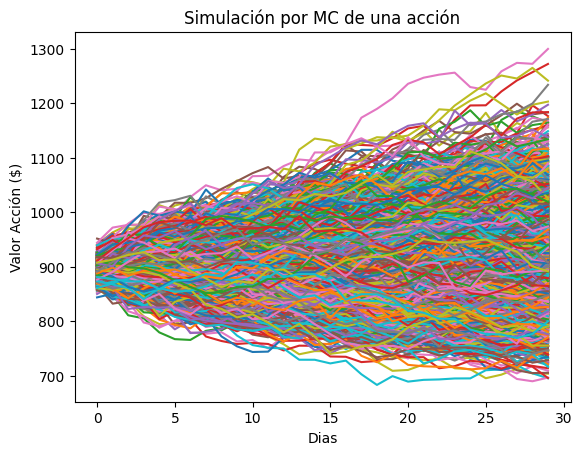

In [7]:
# Funciones de gráfica
def plotSims_single(daily_sims):
    plt.plot(daily_sims)
    plt.ylabel('Valor Acción ($)')
    plt.xlabel('Dias')
    plt.title('Simulación por MC de una acción')
    plt.show()
plotSims_single(daily_sims)

In [8]:
means = []
for i in range(mc_sims):
    means.append(daily_sims[:,i].mean())

In [9]:
ct = np.maximum(means - valor_accion*1.05, 0)

pt = np.maximum(valor_accion*1.05 - means, 0)

In [10]:
co = np.mean(ct)*np.exp(-0.05*30/365)
po = np.mean(pt)*np.exp(-0.05*30/365)
co, po

(6.809996414974592, 37.815412576381)

In [11]:
print("El valor de la accion call es: $" + str(np.round(co, 2)) + "\nEl valor de la accion put es: $" + str(np.round(po, 2)))

El valor de la accion call es: $6.81
El valor de la accion put es: $37.82
